In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [3]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
# 폰트 지정하기
plt.rcParams['font.family'] = 'Malgun Gothic'

In [9]:
# 데이터 확인 및 전처리
path = 'csv_file/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv'

In [11]:
raw = pd.read_csv(path, encoding='cp949')

In [12]:
df = raw.copy()

In [15]:
df.head(3)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202108,1호선,동대문,415,11,10380,1815,7880,5352,12037,...,5983,7,1043,2,2,0,2,0,0,20210903
1,202108,1호선,동묘앞,84,3,2861,918,3286,4614,5128,...,1759,4,827,0,0,0,0,0,0,20210903
2,202108,1호선,서울역,483,11,7963,5533,10871,31479,31643,...,4968,21,444,1,1,0,0,0,0,20210903


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46552 entries, 0 to 46551
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           46552 non-null  int64 
 1   호선명           46552 non-null  object
 2   지하철역          46552 non-null  object
 3   04시-05시 승차인원  46552 non-null  int64 
 4   04시-05시 하차인원  46552 non-null  int64 
 5   05시-06시 승차인원  46552 non-null  int64 
 6   05시-06시 하차인원  46552 non-null  int64 
 7   06시-07시 승차인원  46552 non-null  int64 
 8   06시-07시 하차인원  46552 non-null  int64 
 9   07시-08시 승차인원  46552 non-null  int64 
 10  07시-08시 하차인원  46552 non-null  int64 
 11  08시-09시 승차인원  46552 non-null  int64 
 12  08시-09시 하차인원  46552 non-null  int64 
 13  09시-10시 승차인원  46552 non-null  int64 
 14  09시-10시 하차인원  46552 non-null  int64 
 15  10시-11시 승차인원  46552 non-null  int64 
 16  10시-11시 하차인원  46552 non-null  int64 
 17  11시-12시 승차인원  46552 non-null  int64 
 18  11시-12시 하차인원  46552 non-null  int64 
 19  12시-

In [16]:
# 데이터 크기
df.shape

(46552, 52)

In [18]:
# 결측치 확인
df.isnull().sum()

사용월             0
호선명             0
지하철역            0
04시-05시 승차인원    0
04시-05시 하차인원    0
05시-06시 승차인원    0
05시-06시 하차인원    0
06시-07시 승차인원    0
06시-07시 하차인원    0
07시-08시 승차인원    0
07시-08시 하차인원    0
08시-09시 승차인원    0
08시-09시 하차인원    0
09시-10시 승차인원    0
09시-10시 하차인원    0
10시-11시 승차인원    0
10시-11시 하차인원    0
11시-12시 승차인원    0
11시-12시 하차인원    0
12시-13시 승차인원    0
12시-13시 하차인원    0
13시-14시 승차인원    0
13시-14시 하차인원    0
14시-15시 승차인원    0
14시-15시 하차인원    0
15시-16시 승차인원    0
15시-16시 하차인원    0
16시-17시 승차인원    0
16시-17시 하차인원    0
17시-18시 승차인원    0
17시-18시 하차인원    0
18시-19시 승차인원    0
18시-19시 하차인원    0
19시-20시 승차인원    0
19시-20시 하차인원    0
20시-21시 승차인원    0
20시-21시 하차인원    0
21시-22시 승차인원    0
21시-22시 하차인원    0
22시-23시 승차인원    0
22시-23시 하차인원    0
23시-24시 승차인원    0
23시-24시 하차인원    0
00시-01시 승차인원    0
00시-01시 하차인원    0
01시-02시 승차인원    0
01시-02시 하차인원    0
02시-03시 승차인원    0
02시-03시 하차인원    0
03시-04시 승차인원    0
03시-04시 하차인원    0
작업일자            0
dtype: int64

In [19]:
df.columns

Index(['사용월', '호선명', '지하철역', '04시-05시 승차인원', '04시-05시 하차인원', '05시-06시 승차인원',
       '05시-06시 하차인원', '06시-07시 승차인원', '06시-07시 하차인원', '07시-08시 승차인원',
       '07시-08시 하차인원', '08시-09시 승차인원', '08시-09시 하차인원', '09시-10시 승차인원',
       '09시-10시 하차인원', '10시-11시 승차인원', '10시-11시 하차인원', '11시-12시 승차인원',
       '11시-12시 하차인원', '12시-13시 승차인원', '12시-13시 하차인원', '13시-14시 승차인원',
       '13시-14시 하차인원', '14시-15시 승차인원', '14시-15시 하차인원', '15시-16시 승차인원',
       '15시-16시 하차인원', '16시-17시 승차인원', '16시-17시 하차인원', '17시-18시 승차인원',
       '17시-18시 하차인원', '18시-19시 승차인원', '18시-19시 하차인원', '19시-20시 승차인원',
       '19시-20시 하차인원', '20시-21시 승차인원', '20시-21시 하차인원', '21시-22시 승차인원',
       '21시-22시 하차인원', '22시-23시 승차인원', '22시-23시 하차인원', '23시-24시 승차인원',
       '23시-24시 하차인원', '00시-01시 승차인원', '00시-01시 하차인원', '01시-02시 승차인원',
       '01시-02시 하차인원', '02시-03시 승차인원', '02시-03시 하차인원', '03시-04시 승차인원',
       '03시-04시 하차인원', '작업일자'],
      dtype='object')

In [20]:
# 컬럼 별 데이터 확인

# 사용월

df['사용월'].unique()

array([202108, 202107, 202106, 202105, 202104, 202103, 202102, 202101,
       202012, 202011, 202010, 202009, 202008, 202007, 202006, 202005,
       202004, 202003, 202002, 202001, 201912, 201911, 201910, 201909,
       201908, 201907, 201906, 201905, 201904, 201903, 201902, 201901,
       201812, 201811, 201810, 201809, 201808, 201807, 201806, 201805,
       201804, 201803, 201802, 201801, 201712, 201711, 201710, 201709,
       201708, 201707, 201706, 201705, 201704, 201703, 201702, 201701,
       201612, 201611, 201610, 201609, 201608, 201607, 201606, 201605,
       201604, 201603, 201602, 201601, 201512, 201511, 201510, 201509,
       201508, 201507, 201506, 201505, 201504, 201503, 201502, 201501],
      dtype=int64)

In [21]:
df['호선명'].unique()

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '9호선2~3단계', '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선',
       '과천선', '분당선', '수인선', '안산선', '우이신설선', '일산선', '장항선', '중앙선', '9호선2단계'],
      dtype=object)

In [22]:
# 데이터 타입 확인 및 변경
df.dtypes

사용월              int64
호선명             object
지하철역            object
04시-05시 승차인원     int64
04시-05시 하차인원     int64
05시-06시 승차인원     int64
05시-06시 하차인원     int64
06시-07시 승차인원     int64
06시-07시 하차인원     int64
07시-08시 승차인원     int64
07시-08시 하차인원     int64
08시-09시 승차인원     int64
08시-09시 하차인원     int64
09시-10시 승차인원     int64
09시-10시 하차인원     int64
10시-11시 승차인원     int64
10시-11시 하차인원     int64
11시-12시 승차인원     int64
11시-12시 하차인원     int64
12시-13시 승차인원     int64
12시-13시 하차인원     int64
13시-14시 승차인원     int64
13시-14시 하차인원     int64
14시-15시 승차인원     int64
14시-15시 하차인원     int64
15시-16시 승차인원     int64
15시-16시 하차인원     int64
16시-17시 승차인원     int64
16시-17시 하차인원     int64
17시-18시 승차인원     int64
17시-18시 하차인원     int64
18시-19시 승차인원     int64
18시-19시 하차인원     int64
19시-20시 승차인원     int64
19시-20시 하차인원     int64
20시-21시 승차인원     int64
20시-21시 하차인원     int64
21시-22시 승차인원     int64
21시-22시 하차인원     int64
22시-23시 승차인원     int64
22시-23시 하차인원     int64
23시-24시 승차인원     int64
23시-24시 하차인원     int64
00시-01시 승차인

In [23]:
# 사용월 데이터타입(자료형) 변환 int >> str
df['사용월'] = df['사용월'].astype('str')

In [24]:
df.dtypes

사용월             object
호선명             object
지하철역            object
04시-05시 승차인원     int64
04시-05시 하차인원     int64
05시-06시 승차인원     int64
05시-06시 하차인원     int64
06시-07시 승차인원     int64
06시-07시 하차인원     int64
07시-08시 승차인원     int64
07시-08시 하차인원     int64
08시-09시 승차인원     int64
08시-09시 하차인원     int64
09시-10시 승차인원     int64
09시-10시 하차인원     int64
10시-11시 승차인원     int64
10시-11시 하차인원     int64
11시-12시 승차인원     int64
11시-12시 하차인원     int64
12시-13시 승차인원     int64
12시-13시 하차인원     int64
13시-14시 승차인원     int64
13시-14시 하차인원     int64
14시-15시 승차인원     int64
14시-15시 하차인원     int64
15시-16시 승차인원     int64
15시-16시 하차인원     int64
16시-17시 승차인원     int64
16시-17시 하차인원     int64
17시-18시 승차인원     int64
17시-18시 하차인원     int64
18시-19시 승차인원     int64
18시-19시 하차인원     int64
19시-20시 승차인원     int64
19시-20시 하차인원     int64
20시-21시 승차인원     int64
20시-21시 하차인원     int64
21시-22시 승차인원     int64
21시-22시 하차인원     int64
22시-23시 승차인원     int64
22시-23시 하차인원     int64
23시-24시 승차인원     int64
23시-24시 하차인원     int64
00시-01시 승차인

In [26]:
# 불필요한 컬럼 삭제
df.drop(columns=['작업일자'], inplace=True)

In [29]:
df.tail(3)

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
46549,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,...,1619,6501,86,1617,0,0,0,0,0,0
46550,201501,중앙선,팔당,0,0,161,50,368,149,1227,...,107,336,8,85,0,0,0,0,0,0
46551,201501,중앙선,회기,436,3,10929,3067,23317,10430,65043,...,18205,35702,767,9314,0,0,0,0,0,0


In [30]:
# 승차 / 하차 테이블 분리
# 승차 테이블 분리
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202108,1호선,동대문,415,11,10380,1815,7880,5352,12037,...,1633,5983,7,1043,2,2,0,2,0,0
1,202108,1호선,동묘앞,84,3,2861,918,3286,4614,5128,...,577,1759,4,827,0,0,0,0,0,0
2,202108,1호선,서울역,483,11,7963,5533,10871,31479,31643,...,7756,4968,21,444,1,1,0,0,0,0
3,202108,1호선,시청,6,0,1597,4399,2727,17957,5971,...,2462,822,3,72,0,2,0,0,0,0
4,202108,1호선,신설동,247,6,6828,2721,7333,9771,14821,...,1352,3747,15,390,0,0,0,0,0,0


In [39]:
# 공통 컬럼

df1 = df.iloc[:, :3]

In [34]:
# 승차 컬럼만 가져오기
df2 = df.iloc[:, 3::2]

In [35]:
df2.columns

Index(['04시-05시 승차인원', '05시-06시 승차인원', '06시-07시 승차인원', '07시-08시 승차인원',
       '08시-09시 승차인원', '09시-10시 승차인원', '10시-11시 승차인원', '11시-12시 승차인원',
       '12시-13시 승차인원', '13시-14시 승차인원', '14시-15시 승차인원', '15시-16시 승차인원',
       '16시-17시 승차인원', '17시-18시 승차인원', '18시-19시 승차인원', '19시-20시 승차인원',
       '20시-21시 승차인원', '21시-22시 승차인원', '22시-23시 승차인원', '23시-24시 승차인원',
       '00시-01시 승차인원', '01시-02시 승차인원', '02시-03시 승차인원', '03시-04시 승차인원'],
      dtype='object')

In [36]:
df2.columns.str.split(' ')

Index([['04시-05시', '승차인원'], ['05시-06시', '승차인원'], ['06시-07시', '승차인원'],
       ['07시-08시', '승차인원'], ['08시-09시', '승차인원'], ['09시-10시', '승차인원'],
       ['10시-11시', '승차인원'], ['11시-12시', '승차인원'], ['12시-13시', '승차인원'],
       ['13시-14시', '승차인원'], ['14시-15시', '승차인원'], ['15시-16시', '승차인원'],
       ['16시-17시', '승차인원'], ['17시-18시', '승차인원'], ['18시-19시', '승차인원'],
       ['19시-20시', '승차인원'], ['20시-21시', '승차인원'], ['21시-22시', '승차인원'],
       ['22시-23시', '승차인원'], ['23시-24시', '승차인원'], ['00시-01시', '승차인원'],
       ['01시-02시', '승차인원'], ['02시-03시', '승차인원'], ['03시-04시', '승차인원']],
      dtype='object')

In [37]:
df2.columns.str.split(' ').str[0]

Index(['04시-05시', '05시-06시', '06시-07시', '07시-08시', '08시-09시', '09시-10시',
       '10시-11시', '11시-12시', '12시-13시', '13시-14시', '14시-15시', '15시-16시',
       '16시-17시', '17시-18시', '18시-19시', '19시-20시', '20시-21시', '21시-22시',
       '22시-23시', '23시-24시', '00시-01시', '01시-02시', '02시-03시', '03시-04시'],
      dtype='object')

In [38]:
df2.columns = df2.columns.str.split(' ').str[0]

In [41]:
# 공통컬럼(df1) 과 승차컬럼(df2) 연결하기
pd.concat([df1, df2], axis=1)

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,202108,1호선,동대문,415,10380,7880,12037,16637,15671,13922,...,20332,13464,10336,9669,6514,1633,7,2,0,0
1,202108,1호선,동묘앞,84,2861,3286,5128,8066,7541,9130,...,19551,8704,5031,4235,2678,577,4,0,0,0
2,202108,1호선,서울역,483,7963,10871,31643,49003,36383,35273,...,152659,72119,47289,51106,27974,7756,21,1,0,0
3,202108,1호선,시청,6,1597,2727,5971,6884,7541,8328,...,119064,41635,31787,27796,13739,2462,3,0,0,0
4,202108,1호선,신설동,247,6828,7333,14821,20523,14881,13551,...,48482,18413,11610,9764,5955,1352,15,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46547,201501,중앙선,운길산,0,177,642,1292,1479,1438,1408,...,2304,1332,1002,942,270,111,3,0,0,0
46548,201501,중앙선,원덕,1,292,415,537,823,980,1025,...,563,175,156,53,71,8,3,0,0,0
46549,201501,중앙선,중랑,14,4929,8539,22160,25792,14328,11117,...,8399,6449,4652,3849,3062,1619,86,0,0,0
46550,201501,중앙선,팔당,0,161,368,1227,910,897,1009,...,1617,845,492,420,309,107,8,0,0,0


In [42]:
df_in = pd.concat([df1, df2], axis=1)
df_in[:3]

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,202108,1호선,동대문,415,10380,7880,12037,16637,15671,13922,...,20332,13464,10336,9669,6514,1633,7,2,0,0
1,202108,1호선,동묘앞,84,2861,3286,5128,8066,7541,9130,...,19551,8704,5031,4235,2678,577,4,0,0,0
2,202108,1호선,서울역,483,7963,10871,31643,49003,36383,35273,...,152659,72119,47289,51106,27974,7756,21,1,0,0


In [43]:
# 하차 테이블 만들기
# 공통컬럼 (df1)

df1 = df.iloc[:, :3]

In [44]:
# 하차 컬러만 가져오기
df.iloc[:, 4::2]

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
0,11,1815,5352,9885,19783,19192,17298,19346,19492,18295,...,16304,15398,10356,8870,7191,5983,1043,2,2,0
1,3,918,4614,8004,18779,15213,17602,21823,23065,24178,...,9210,5827,3835,3839,3706,1759,827,0,0,0
2,11,5533,31479,73669,149249,94786,50691,42942,46909,45564,...,61655,38909,25080,21490,13638,4968,444,1,0,0
3,0,4399,17957,53669,141150,60972,24743,22388,20191,18708,...,11317,5636,3793,3501,2205,822,72,2,0,0
4,6,2721,9771,21765,52910,28274,18729,16195,16020,15974,...,22904,15802,10231,9428,7268,3747,390,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46547,0,56,403,675,1390,3270,3673,3090,1780,2147,...,1218,1457,769,760,775,633,222,0,0,0
46548,0,4,46,248,344,273,497,504,537,390,...,721,714,612,404,339,383,157,0,0,0
46549,1,424,2084,3027,6573,6133,5605,5192,6016,7633,...,19547,21424,14362,11678,11060,6501,1617,0,0,0
46550,0,50,149,523,1151,2931,3932,2199,1333,897,...,822,749,320,319,339,336,85,0,0,0


In [47]:
df2 = df.iloc[:, 4::2]
df2.columns = df2.columns.str.split(' ').str[0]

In [48]:
# 공통 컬럼과 하차 컬럼 연결하기
df_out = pd.concat([df1, df2], axis=1)

In [49]:
df_out.head(3)

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,202108,1호선,동대문,11,1815,5352,9885,19783,19192,17298,...,16304,15398,10356,8870,7191,5983,1043,2,2,0
1,202108,1호선,동묘앞,3,918,4614,8004,18779,15213,17602,...,9210,5827,3835,3839,3706,1759,827,0,0,0
2,202108,1호선,서울역,11,5533,31479,73669,149249,94786,50691,...,61655,38909,25080,21490,13638,4968,444,1,0,0


In [52]:
# 출퇴근 시간 역별 승하차인원 분석

# 최근 월 기준으로 한 승하차 데이터 프레임 생성

df_in[df_in['사용월'] == '202108']

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,202108,1호선,동대문,415,10380,7880,12037,16637,15671,13922,...,20332,13464,10336,9669,6514,1633,7,2,0,0
1,202108,1호선,동묘앞,84,2861,3286,5128,8066,7541,9130,...,19551,8704,5031,4235,2678,577,4,0,0,0
2,202108,1호선,서울역,483,7963,10871,31643,49003,36383,35273,...,152659,72119,47289,51106,27974,7756,21,1,0,0
3,202108,1호선,시청,6,1597,2727,5971,6884,7541,8328,...,119064,41635,31787,27796,13739,2462,3,0,0,0
4,202108,1호선,신설동,247,6828,7333,14821,20523,14881,13551,...,48482,18413,11610,9764,5955,1352,15,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,202108,중앙선,원덕,72,277,689,643,883,755,661,...,544,442,215,94,25,0,0,0,0,0
603,202108,중앙선,중랑,200,5961,8782,19739,18610,13213,8053,...,6531,4213,2938,2513,1654,430,5,0,0,0
604,202108,중앙선,지평,0,1,2,347,218,18,325,...,35,215,2,27,14,0,0,0,0,0
605,202108,중앙선,팔당,1,212,788,1261,1267,1123,1208,...,2857,2067,2057,1927,559,56,0,0,0,0


In [53]:
df_in_202108 = df_in[df_in['사용월'] == '202108']
df_out_202108 = df_out[df_out['사용월'] == '202108']

In [54]:
df_in_202108.head(3)

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,202108,1호선,동대문,415,10380,7880,12037,16637,15671,13922,...,20332,13464,10336,9669,6514,1633,7,2,0,0
1,202108,1호선,동묘앞,84,2861,3286,5128,8066,7541,9130,...,19551,8704,5031,4235,2678,577,4,0,0,0
2,202108,1호선,서울역,483,7963,10871,31643,49003,36383,35273,...,152659,72119,47289,51106,27974,7756,21,1,0,0


In [55]:
df_out_202108.head(3)

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,202108,1호선,동대문,11,1815,5352,9885,19783,19192,17298,...,16304,15398,10356,8870,7191,5983,1043,2,2,0
1,202108,1호선,동묘앞,3,918,4614,8004,18779,15213,17602,...,9210,5827,3835,3839,3706,1759,827,0,0,0
2,202108,1호선,서울역,11,5533,31479,73669,149249,94786,50691,...,61655,38909,25080,21490,13638,4968,444,1,0,0


In [56]:
# 출근 시간에 가장 많은 사람이 승차하는 역은 어디일까요? (08-09시)

df_in_202108.nlargest(10, '08시-09시')[['지하철역','08시-09시']]

,지하철역,08시-09시
37,신림,267128
14,구로디지털단지,153411
28,서울대입구(관악구청),150090
83,연신내,132615
133,까치산,130443
52,잠실(송파구청),128005
175,화곡,121310
112,쌍문,112812
36,신도림,111452
35,신대방,110766


In [57]:
# 출근시간에 가장 많은 사람이 하차하는 역은 어디일까요?(09시-10시)

df_out_202108.nlargest(10, '09시-10시')[['지하철역','09시-10시']]

,지하철역,09시-10시
10,강남,274355
43,역삼,226437
215,가산디지털단지,188412
30,선릉,178766
26,삼성(무역센터),172539
80,압구정,139283
31,성수,124935
78,신사,122905
13,교대(법원.검찰청),121163
14,구로디지털단지,121092


In [58]:
# 퇴근시간에 가장 많은 사람이 승차하는 역은 어디일까 ? (18시 - 19시)
df_in_202108.nlargest(10,'18시-19시')[['지하철역','18시-19시']]

,지하철역,18시-19시
10,강남,302398
215,가산디지털단지,283125
30,선릉,245318
43,역삼,239209
26,삼성(무역센터),230299
50,을지로입구,207093
31,성수,202624
14,구로디지털단지,192537
82,양재(서초구청),174296
128,광화문(세종문화회관),173772


In [60]:
df_in_202108.nlargest(10,'20시-21시', keep='first')[['지하철역','20시-21시']]
# keep='first' : 동일 값의 첫 번째 행 유지
# keep='last' : 동일 값의 마지막 행 유지
# keep='all' : 동일 값의 모든 행 유지

,지하철역,20시-21시
10,강남,138452
52,잠실(송파구청),109713
59,홍대입구,104619
63,고속터미널,97789
26,삼성(무역센터),91086
360,영등포,74616
50,을지로입구,72237
363,용산,69802
30,선릉,69492
43,역삼,66771


In [62]:
# 퇴근시간에 가장 많은 사람이 하차하는 역은 어디일까 ? (19시 - 20시)
df_out_202108.nlargest(10,'19시-20시', keep='first')[['지하철역','19시-20시']]

,지하철역,19시-20시
37,신림,182832
28,서울대입구(관악구청),121426
52,잠실(송파구청),116568
14,구로디지털단지,107520
83,연신내,103283
36,신도림,97759
109,수유(강북구청),93666
133,까치산,87948
112,쌍문,86631
438,부천,85018


In [63]:
# 강남역 최근 시간대별 승하차 정보 분석

# 강남역의 최근 승차 정보 분석

In [68]:
# 강남역 최근 승차데이터 불러오기

df_gangnam_in = df_in_202108[df_in_202108['지하철역']== '강남'].iloc[:, 3:]
df_gangnam_in

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
10,64,4993,14177,31783,50239,40611,44108,59573,75942,88926,...,302398,178242,138452,157847,105997,12509,5,2,0,0


In [70]:
# melt
df_gangnam_in.melt()

,variable,value
0,04시-05시,64
1,05시-06시,4993
2,06시-07시,14177
3,07시-08시,31783
4,08시-09시,50239
5,09시-10시,40611
6,10시-11시,44108
7,11시-12시,59573
8,12시-13시,75942
9,13시-14시,88926


In [71]:
df_gangnam_in = df_gangnam_in.melt()

In [73]:
# 컬럼명 변경
df_gangnam_in.columns = ['시간대','승차건수']

In [76]:
df_gangnam_in.sort_values(by='승차건수')

,시간대,승차건수
23,03시-04시,0
22,02시-03시,0
21,01시-02시,2
20,00시-01시,5
0,04시-05시,64
1,05시-06시,4993
19,23시-24시,12509
2,06시-07시,14177
3,07시-08시,31783
5,09시-10시,40611


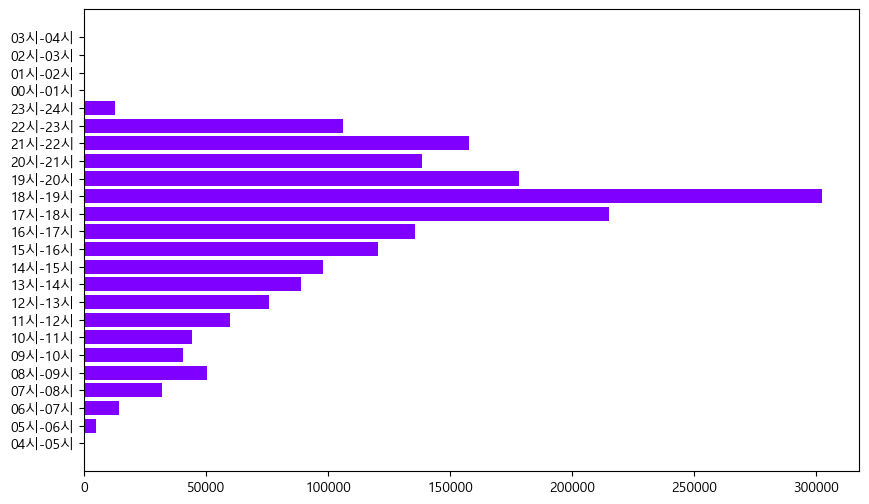

In [80]:
# 데이터 시각화
# 시간대 별 승차인원 시각화 하기

#df_gangnam_in

plt.figure(figsize=(10,6))
plt.barh(df_gangnam_in['시간대'],df_gangnam_in['승차건수'] , color='#7f00ff')
plt.show()

In [82]:
# 강남역의 최근 하차 정보 분석

# 강남역 최근 하차 정보 데이터 불러오기
df_out_202108[df_out_202108['지하철역'] == '강남']

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
10,202108,2호선,강남,4,10411,45059,129595,269877,274355,129744,...,125891,68747,34635,27783,21970,8377,15,1,0,0


In [84]:
df_gangnam_out = df_out_202108[df_out_202108['지하철역'] == '강남'].iloc[:,3:]

In [86]:
df_gangnam_out = df_gangnam_out.melt()

In [87]:
df_gangnam_out.head(3)

,variable,value
0,04시-05시,4
1,05시-06시,10411
2,06시-07시,45059


In [91]:
# 컬럼 명 변경
df_gangnam_out.columns = ['시간대','하차건수']

In [92]:
df_gangnam_out.sort_values('하차건수')

,시간대,하차건수
23,03시-04시,0
22,02시-03시,0
21,01시-02시,1
0,04시-05시,4
20,00시-01시,15
19,23시-24시,8377
1,05시-06시,10411
18,22시-23시,21970
17,21시-22시,27783
16,20시-21시,34635


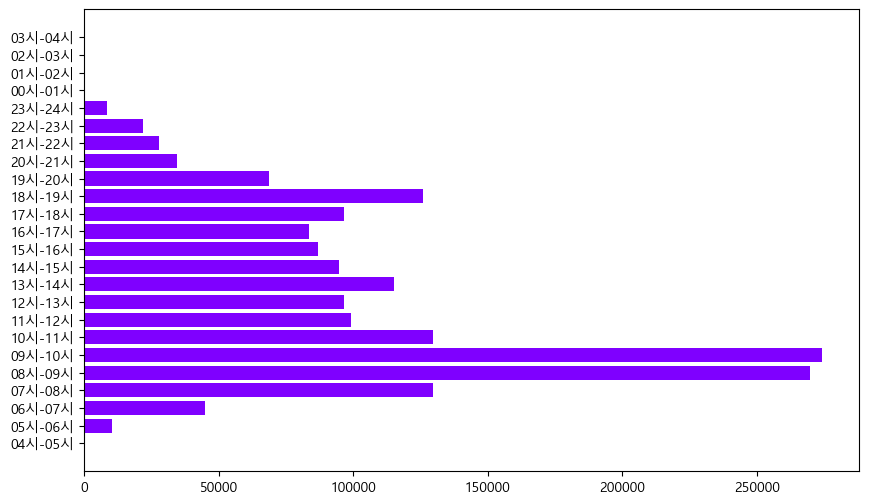

In [95]:
# 시간대별 승차인원 시각화하기

# df_gangnam_out
plt.figure(figsize=(10,6))
plt.barh(df_gangnam_out['시간대'],df_gangnam_out['하차건수'], color ='#7f00ff')
plt.show()

In [96]:
# 지하철 시간대별, 역별
# 시간대별 승차 현황
# 승차정보 집계 데이터 생성

In [98]:
df_in_202108.head()

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,202108,1호선,동대문,415,10380,7880,12037,16637,15671,13922,...,20332,13464,10336,9669,6514,1633,7,2,0,0
1,202108,1호선,동묘앞,84,2861,3286,5128,8066,7541,9130,...,19551,8704,5031,4235,2678,577,4,0,0,0
2,202108,1호선,서울역,483,7963,10871,31643,49003,36383,35273,...,152659,72119,47289,51106,27974,7756,21,1,0,0
3,202108,1호선,시청,6,1597,2727,5971,6884,7541,8328,...,119064,41635,31787,27796,13739,2462,3,0,0,0
4,202108,1호선,신설동,247,6828,7333,14821,20523,14881,13551,...,48482,18413,11610,9764,5955,1352,15,0,0,0


In [198]:
df_in_202108_agg = df_in_202108.copy()

In [199]:
df_in_202108_agg[:3]

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
0,202108,1호선,동대문,415,10380,7880,12037,16637,15671,13922,...,20332,13464,10336,9669,6514,1633,7,2,0,0
1,202108,1호선,동묘앞,84,2861,3286,5128,8066,7541,9130,...,19551,8704,5031,4235,2678,577,4,0,0,0
2,202108,1호선,서울역,483,7963,10871,31643,49003,36383,35273,...,152659,72119,47289,51106,27974,7756,21,1,0,0


In [200]:
""" 1
# index 변경 ('지하철역')
df_in_202108_agg.set_index(['지하철역'], inplace=True)
"""

" 1\n# index 변경 ('지하철역')\ndf_in_202108_agg.set_index(['지하철역'], inplace=True)\n"

In [201]:
# 2
# index 변경 ('지하철역') 
# > 사용 이유는 위의 set_index처럼 완전하게 빠지는게 아님
df_in_202108_agg.index = df_in_202108_agg['지하철역']

In [202]:
df_in_202108_agg.head(3)

,사용월,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
지하철역,,,,,,,,,,,,,,,,,,,,,
동대문,202108,1호선,동대문,415,10380,7880,12037,16637,15671,13922,...,20332,13464,10336,9669,6514,1633,7,2,0,0
동묘앞,202108,1호선,동묘앞,84,2861,3286,5128,8066,7541,9130,...,19551,8704,5031,4235,2678,577,4,0,0,0
서울역,202108,1호선,서울역,483,7963,10871,31643,49003,36383,35273,...,152659,72119,47289,51106,27974,7756,21,1,0,0


In [203]:
# 1번의 코드를 사용한다고 하면 .drop(columns=['사용월','호선명'] 이렇게 해야함.
# 불필요한 컬럼 삭제('사용월','호선명','지하철역')

df_in_202108_agg.drop(columns=['사용월','호선명','지하철역'], inplace=True)
df_in_202108_agg[:3]

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시
지하철역,,,,,,,,,,,,,,,,,,,,,
동대문,415,10380,7880,12037,16637,15671,13922,15675,18244,19566,...,20332,13464,10336,9669,6514,1633,7,2,0,0
동묘앞,84,2861,3286,5128,8066,7541,9130,13369,18112,21526,...,19551,8704,5031,4235,2678,577,4,0,0,0
서울역,483,7963,10871,31643,49003,36383,35273,41477,48720,50740,...,152659,72119,47289,51106,27974,7756,21,1,0,0


In [204]:
# 행, 열 합계
# 서로 다른 행끼리 열로 합침
df_in_202108_agg.loc['sum'] = df_in_202108_agg.apply('sum', axis=0)
df_in_202108_agg.loc['sum'][:3]

04시-05시     125592
05시-06시    2679895
06시-07시    5392644
Name: sum, dtype: int64

In [205]:
# 서로다른 열끼리 행으로 합침.
df_in_202108_agg['sum'] = df_in_202108_agg.apply('sum', axis=1)

In [206]:
df_in_202108_agg.tail(3)

,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,12시-13시,13시-14시,...,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,01시-02시,02시-03시,03시-04시,sum
지하철역,,,,,,,,,,,,,,,,,,,,,
팔당,1,212,788,1261,1267,1123,1208,1127,1339,1521,...,2067,2057,1927,559,56,0,0,0,0,28424
회기,719,11133,18619,47471,59922,39563,31469,31674,33153,30224,...,21128,17210,17437,13269,3634,63,0,0,0,560588
sum,125592,2679895,5392644,13007398,14639529,8962001,6688112,6762631,7277223,7301932,...,8671470,6611588,6032973,3852573,744365,6086,26,3,1,153448619


In [207]:
# 시간대별 승차건수
s_in = df_in_202108_agg.loc['sum'][:-1].sort_values()

In [208]:
s_in = s_in.sort_index()

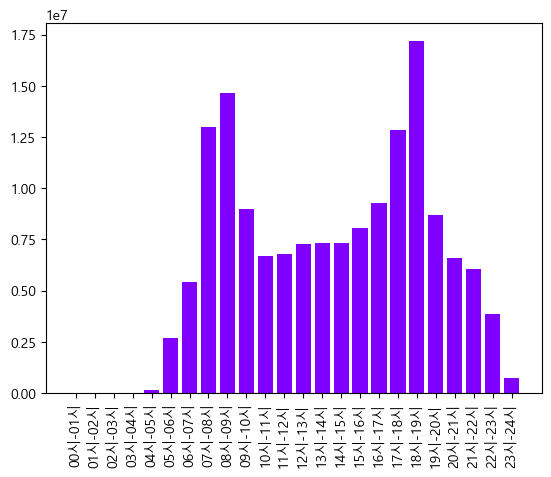

In [209]:
x = s_in.index
y = s_in.values

plt.bar(x,y, color='#7f00ff')
plt.xticks(rotation=90)
plt.show()

In [210]:
# 지하철역 승차건수
df_in_202108_agg['sum'][:-1].sort_values()
# 오름차순 정렬

지하철역
신내                3
검암                4
지축                4
계양                5
창동                6
             ...   
홍대입구        1247932
구로디지털단지     1331304
신림          1503604
잠실(송파구청)    1539356
강남          1874711
Name: sum, Length: 607, dtype: int64

In [211]:
df_in_202108_agg['sum'][:-1].sort_values(ascending=False).to_frame()

,sum
지하철역,
강남,1874711
잠실(송파구청),1539356
신림,1503604
구로디지털단지,1331304
홍대입구,1247932
...,...
창동,6
계양,5
지축,4


In [252]:
#df_out_202108 활용
df_out_202108_agg = df_out_202108.copy()

In [253]:
df_out_202108_agg.set_index(['지하철역'], inplace=True)

In [254]:
df_out_202108_agg.drop(columns=['사용월','호선명'], inplace=True)

In [255]:
# 행, 열 합계
df_out_202108_agg.loc['sum'] = df_out_202108_agg.apply('sum',axis=0)

In [256]:
df_out_202108_agg['sum'] = df_out_202108_agg.apply('sum',axis=1)

In [257]:
# 시간대별 하차건수
df_out_202108_agg.loc['sum'].sort_values()

03시-04시            1
02시-03시           12
01시-02시           66
04시-05시         1644
00시-01시       214094
05시-06시       706189
23시-24시      2216218
06시-07시      3603606
22시-23시      5217987
21시-22시      6338999
11시-12시      6666215
12시-13시      7062738
20시-21시      7093483
10시-11시      7146549
14시-15시      7174578
13시-14시      7449305
15시-16시      7581218
07시-08시      8042590
16시-17시      8380236
17시-18시     10646691
09시-10시     11402630
19시-20시     12354319
18시-19시     16007443
08시-09시     17604264
sum        152911075
Name: sum, dtype: int64

In [262]:
s_out = df_out_202108_agg.loc['sum'][:-1].sort_values(ascending=False)[:10]

In [263]:
s_out = s_out.sort_index()

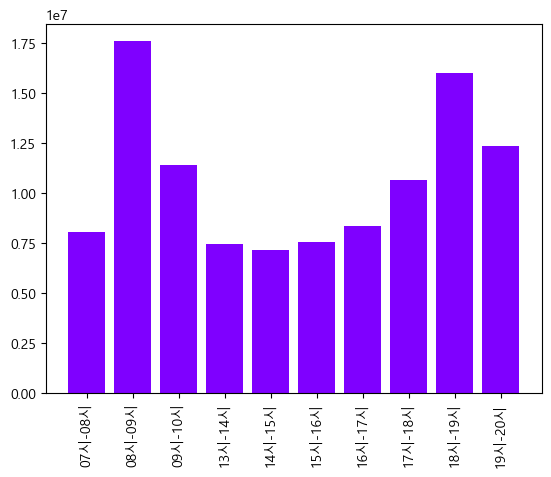

In [265]:
x = s_out.index
y = s_out.values

plt.bar(x,y, color='#7f00ff')
plt.xticks(rotation=90)
plt.show()